In [110]:
# read in data + subset desired sections
import pandas as pd
df = pd.read_csv("cleaned_youngpeople_data.csv")
df = df.iloc[:, 76: 140]

In [111]:
# turn categorical variables into numeric
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
df["Punctuality1"] = ord_enc.fit_transform(df[["Punctuality"]])
df["Lying1"] = ord_enc.fit_transform(df[["Lying"]])
df["Internet usage1"] = ord_enc.fit_transform(df[["Internet usage"]])
df = df.drop(["Punctuality", "Lying", "Internet usage"], axis = 1) 

In [130]:
# split into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(df.columns[134:140], axis = 'columns'), df["Spending on healthy eating"], test_size = 0.2, random_state = 6)

In [131]:
from sklearn.naive_bayes import MultinomialNB
# fit data to model
model = MultinomialNB()
model.fit(X_train, y_train)

# check model accuracy
model.score(X_test,y_test)

0.49489795918367346

In [132]:
# predict using testing data
y_predicted = model.predict(X_test)

Text(69.0, 0.5, 'Truth')

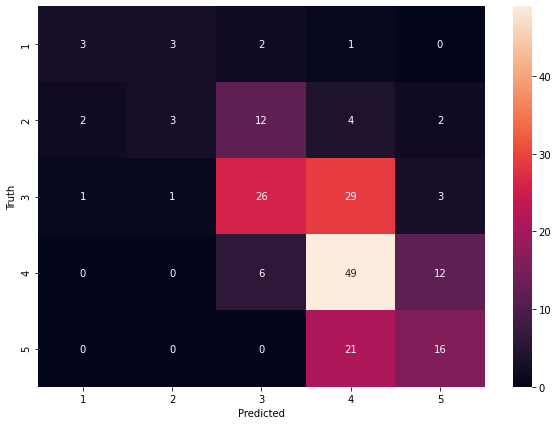

In [133]:
# plot results
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, xticklabels = [1,2,3,4,5], yticklabels = [1,2,3,4,5])
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [134]:
# implement feature selection
from sklearn.feature_selection import SelectFromModel
from sklearn.naive_bayes import MultinomialNB
selector = SelectFromModel(estimator=MultinomialNB()).fit(X_train, y_train)
X_train_new = selector.transform(X_train)
X_test_new = selector.transform(X_test)

In [135]:
# fit data to model
model = MultinomialNB()
model.fit(X_train_new, y_train)

# check model accuracy
model.score(X_test_new,y_test)

0.5459183673469388

In [136]:
# predict using testing data
y_predicted = model.predict(X_test_new)

Text(69.0, 0.5, 'Truth')

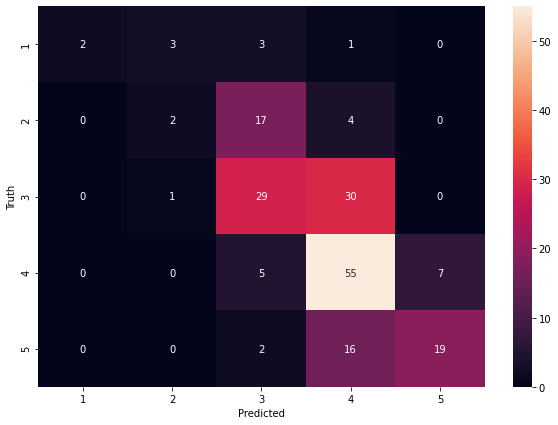

In [137]:
# plot results
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, xticklabels = [1,2,3,4,5], yticklabels = [1,2,3,4,5])
plt.xlabel("Predicted")
plt.ylabel("Truth")